In [16]:
import subprocess
import sys
import os
import time
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

Задаем начальные параметры генерации:

In [65]:
cpp_executable = "./maingen"    # путь к скомпилированной C++ программе
output_file = "result.txt"  # файл, в который C++ программа пишет результат
reps = 1000;                # количество повторений метода Монте-Карло
N = 100000;                   # размер выборки
delta = 0.5;               # расстояние для постройки дистанционного графа
distrib = "norm";                # вид распределения: uni, exp, norm 
type_ = "click";             # тип статистики: click, concomp, 
param = 3                  # параметр для некоторых статистик, например число клик для click

input_args = list(map(str, [N, delta, reps, distrib, type_, param]))
command = [cpp_executable] + input_args

Генерируем выборку:

In [66]:
process = subprocess.Popen(
    command,
    text=True,
    stdout=subprocess.PIPE
)
with tqdm(total=100, unit="%") as pbar:
    while True:
        line = process.stdout.readline()
        if not line:
            break
        try:
            progress_str = line.split("Progress:")[0].strip()
            progress_value = float(progress_str)
            pbar.update(progress_value - pbar.n)
        except ValueError:
            pass

100%|█| 100.0/100 [00:25<00:00,  3.95%


In [67]:
with open(output_file, 'r', encoding='utf-8') as f:
    file = f.read()
file = list(map(float, file.split()))
data = pd.Series(file)
result = data

Создаем картинку для визуальной оценки нормальности распределения: гистограмму и QQ-plot:

Text(0.5, 1.0, 'Q-Q Plot')

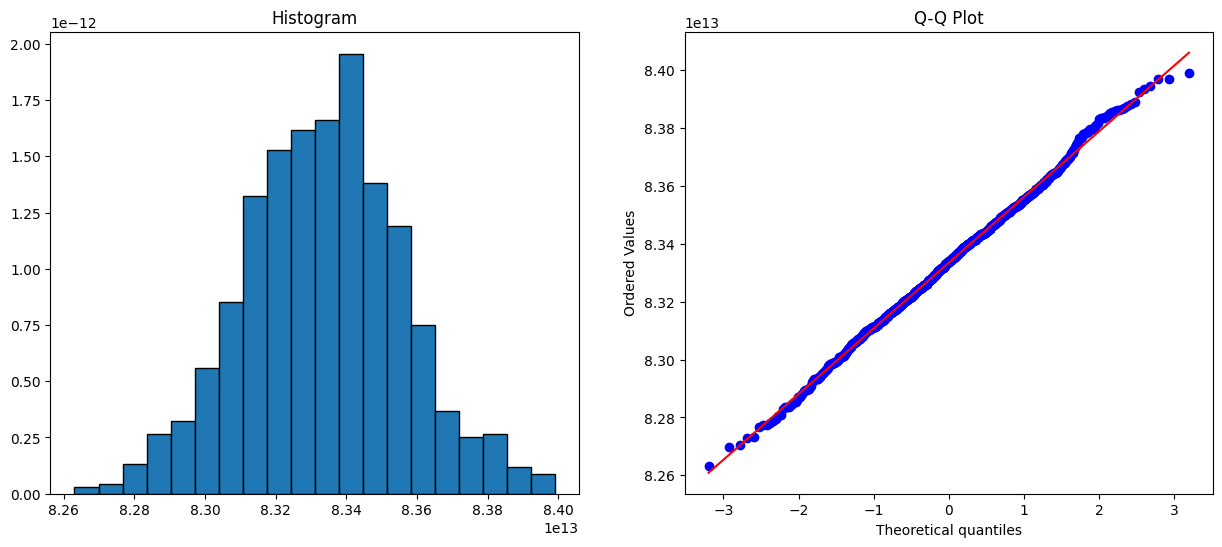

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

freq, edges = np.histogram(result, bins=20, density=True)
ax[0].bar(edges[:-1], freq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0].set_title('Histogram')

result_array = np.asarray(result)
qq = stats.probplot(result_array, rvalue=False, plot=ax[1])
ax[1].set_title('Q-Q Plot')